# US Automobile Accidents 2018 to March 2023 - A Technical Report and Analysis 

![Alt text](image-1.png)

![Alt text](image-2.png)
### Version_1
- Loaded data into Dataframe and performed some basic analysis and dropping of rows.

### Version_2
- Added additional analysis on the data and corrected the layout of the report. Also changed the style of the Markdown Cells to be formatted correctly. Also added a picture at the top of the report showing the layout of the report required for the project. 
#### 10/01/2023



# Section 1: Introduction 

# Section 2: Data Acquisition and Cleaning

### Libraries used in this project: 


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import plotly.graph_objects as go
import scipy.stats as stats

In [13]:
# From csv to pd dataframe
df = pd.read_csv(r'C:\Users\elanw\OneDrive\Desktop\School\MSAAI_500\Group_Project\US_Accidents_March23.csv')

# col change 
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

# filtering out data before 2018
df_filtered = df[df['Start_Time'].dt.year >= 2018]

# sorting by time 
df_sorted = df_filtered.sort_values(by='Start_Time')

# changin the df ref name 
df = df_sorted

df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7576435,A-7625803,Source1,4,2018-01-01 00:07:06,2018-01-01 06:07:06,41.730490,-86.338150,41.704050,-86.625760,14.945,...,False,False,False,False,False,False,Night,Night,Night,Night
7576436,A-7625804,Source1,2,2018-01-01 00:08:27,2018-01-01 00:38:27,39.976279,-83.116542,39.976279,-83.116542,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
7576437,A-7625805,Source1,2,2018-01-01 00:08:27,2018-01-01 00:38:27,39.975830,-83.117170,39.975830,-83.117170,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
7576469,A-7625837,Source1,4,2018-01-01 00:13:51,2018-01-01 06:13:51,33.823210,-84.129240,33.824210,-84.150250,1.208,...,False,False,False,False,False,False,Night,Night,Night,Night
7576680,A-7626048,Source1,4,2018-01-01 00:14:30,2018-01-01 06:14:30,39.128510,-94.567830,39.130970,-94.567890,0.170,...,False,False,False,False,False,False,Night,Night,Night,Night


#### Getting all of the column names in the Data Frame and Explaining Them

In [5]:
column_names_list = df.columns.values.tolist()
column_names_list

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

#### Data Columns

ID: The ID of the accident, unique key.
 
Source: Pulled from two diffrerent sources 

Severity: On a scale of 1-4, how severe the accident was at the time of recording, four being the most severe. 

Start_Time: Date the accident took place, in the format of YYYY-MM-DD HH:MM:SS (We have filtered out any dates that are older than 2018)

End_Time: Date the accident ended, in the format of YYYY-MM-DD HH:MM:SS

Start_Lat: Latitude of the accident from inital impact

Start_Lng: Longitude of the accident from inital impact

End_Lat: Latitude of the accident from ending place of the vehicle 

End_Lng: Longitude of the accident from ending place of the vehicle

Distance(mi): distance in miles that the accident occured from the starting point

Description: Description of the accident and the incident that occured 

Street: Street name of the accident

City: City name of the accident

County: County name of the accident

State: State name of the accident (49 states are listed in this data set)

Zipcode: Zipcode that the accident Occured in

Country: Country of the Accident (All accidents that occured happened in the United States)

Timezone: Timezone of the accident

Airport_Code: The closest Airport to the accident

Weather_Timestamp: the time-stamp of weather observation

Temperature(F): Temperature in Fahrenheit

Wind_Chill(F): Wind chilld in Fahrenheit

Humidity(%): Shows the humidity (in percentage).

Pressure(in): Shows the air pressure (in inches).

Visibility(mi): Shows visibility (in miles).

Wind_Direction: Shows wind direction.

Wind_Speed(mph): Shows wind speed (in miles per hour).

Precipitation(in): Shows precipitation amount in inches, if there is any.

Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

Amenity: A POI annotation which indicates presence of amenity in a nearby location.

Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.

Crossing: A POI annotation which indicates presence of crossing in a nearby location.

Give_Way: A POI annotation which indicates presence of give_way in a nearby location.

Junction: A POI annotation which indicates presence of junction in a nearby location.

No_Exit: A POI annotation which indicates presence of no_exit in a nearby location.

Railway: A POI annotation which indicates presence of railway in a nearby location.

Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.

Station: A POI annotation which indicates presence of station in a nearby location.

Stop: A POI annotation which indicates presence of stop in a nearby location.

Traffic_Calming: A POI annotation which indicates presence of traffic_calming in a nearby location.

Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.

Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.

Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.

Astronomical_Twilight: hows the period of day (i.e. day or night) based on astronomical twilight.




### Droping Columns that are Blank or Not Needed for analysis

In [15]:
# Columns to drop
columns_to_drop = ['Country', 'Timezone', 'Airport_Code', 'Description', 'Street', 'Astronomical_Twilight', 'Civil_Twilight', 'Nautical_Twilight',]
df = df.drop(columns=columns_to_drop)

# Verify
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
7576435,A-7625803,Source1,4,2018-01-01 00:07:06,2018-01-01 06:07:06,41.730490,-86.338150,41.704050,-86.625760,14.945,...,False,False,False,False,False,False,False,False,False,Night
7576436,A-7625804,Source1,2,2018-01-01 00:08:27,2018-01-01 00:38:27,39.976279,-83.116542,39.976279,-83.116542,0.000,...,False,False,False,False,False,False,False,False,False,Night
7576437,A-7625805,Source1,2,2018-01-01 00:08:27,2018-01-01 00:38:27,39.975830,-83.117170,39.975830,-83.117170,0.000,...,False,False,False,False,False,False,False,False,False,Night
7576469,A-7625837,Source1,4,2018-01-01 00:13:51,2018-01-01 06:13:51,33.823210,-84.129240,33.824210,-84.150250,1.208,...,True,False,False,False,False,False,False,False,False,Night
7576680,A-7626048,Source1,4,2018-01-01 00:14:30,2018-01-01 06:14:30,39.128510,-94.567830,39.130970,-94.567890,0.170,...,True,False,False,False,False,False,False,False,False,Night


### Changing all of the Values that are True or False to 1 or 0 

In [16]:

# Define a function to convert boolean to integer
def convert_boolean(val):
    if isinstance(val, bool):
        return int(val)
    return val

# Apply the function to the entire DataFrame
df = df.applymap(convert_boolean)

# To verify the changes
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
7576435,A-7625803,Source1,4,2018-01-01 00:07:06,2018-01-01 06:07:06,41.730490,-86.338150,41.704050,-86.625760,14.945,...,0,0,0,0,0,0,0,0,0,Night
7576436,A-7625804,Source1,2,2018-01-01 00:08:27,2018-01-01 00:38:27,39.976279,-83.116542,39.976279,-83.116542,0.000,...,0,0,0,0,0,0,0,0,0,Night
7576437,A-7625805,Source1,2,2018-01-01 00:08:27,2018-01-01 00:38:27,39.975830,-83.117170,39.975830,-83.117170,0.000,...,0,0,0,0,0,0,0,0,0,Night
7576469,A-7625837,Source1,4,2018-01-01 00:13:51,2018-01-01 06:13:51,33.823210,-84.129240,33.824210,-84.150250,1.208,...,1,0,0,0,0,0,0,0,0,Night
7576680,A-7626048,Source1,4,2018-01-01 00:14:30,2018-01-01 06:14:30,39.128510,-94.567830,39.130970,-94.567890,0.170,...,1,0,0,0,0,0,0,0,0,Night


56.6 s Function 

### Dropping all rows with missing values

In [17]:
# Dropping all rows with missing vals 
df = df.dropna()

print(df.shape)

(3551471, 38)


### Adding the Weekday, Month, Day, Hour, and Minute Columns to the Data Frame

I am hoping that by using time, we can see if there are any trends in the data that we can use to predict the severity of the accident.

In [9]:
# Cast Start_Time to datetime
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

# Extract year, month, weekday and day
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day

# Extract hour and minute
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute

df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Weekday,Day,Hour,Minute
7576435,A-7625803,Source1,4,2018-01-01 00:07:06,2018-01-01 06:07:06,41.730490,-86.338150,41.704050,-86.625760,14.945,...,0,0,0,Night,2018,1,0,1,0,7
7576681,A-7626049,Source1,2,2018-01-01 01:17:30,2018-01-01 07:17:30,41.202430,-95.948110,41.214100,-95.952020,0.832,...,0,0,0,Night,2018,1,0,1,1,17
7576589,A-7625957,Source1,2,2018-01-01 01:51:00,2018-01-01 02:21:00,40.369102,-78.433999,40.369471,-78.435862,0.101,...,0,0,0,Night,2018,1,0,1,1,51
7576588,A-7625956,Source1,2,2018-01-01 01:51:00,2018-01-01 02:21:00,40.369469,-78.435852,40.369102,-78.433999,0.101,...,0,0,0,Night,2018,1,0,1,1,51
7576780,A-7626148,Source1,4,2018-01-01 02:02:29,2018-01-01 08:02:29,38.855510,-110.920290,38.844746,-111.059622,7.534,...,0,0,0,Night,2018,1,0,1,2,2


# Section 3: Exploratory Data Analysis (EDA)

### Correlation Matrix to see the correlation between all of the Variables

In [10]:
Correlation_Matrix = df.corr()

# Correlation Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(Correlation_Matrix, annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'A-7625803'

#### Pivot table to get the count of accidents by State and the Severity of Accident counts 

In [ ]:
pivot_table = pd.pivot_table(df, index='State', columns='Severity', values='ID', aggfunc='count', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)

print(pivot_table)

Severity     1       2     3      4   Total
State                                      
AL         114   25159   410   1152   26835
AR          11   16460   208   2022   18701
AZ        6195   64321   526   2233   73275
CA        4608  864589  5539   6638  881374
CO         513   25338  6047   4359   36257
CT           5   37902   792   2624   41323
DC          37   12751   251    520   13559
DE           7    5316   233   1048    6604
FL        2831  516850  4257   6246  530184
GA         374   46002  1906   5464   53746
IA           3   10449   230   1183   11865
ID           0    8363    39    356    8758
IL         237   29522  9212   1935   40906
IN          37   19575  1034   2846   23492
KS           5   10741   396    402   11544
KY          31    3970   251    386    4638
LA        1147   65466   966    988   68567
MA         166    3215  1474    300    5155
MD         228   59273  1794   5274   66569
ME           0     808    13     33     854
MI          28   49115  1464   3

### The Pivot Table shows that there are 49 states, The only State Missing from this data set is The State of Hawaii

### Interactive Map of Accidents by The State 

In [ ]:
state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of US Accidents for each State", geo_scope="usa")
fig.show()

### Getting the top 20 Cities with the most accidents

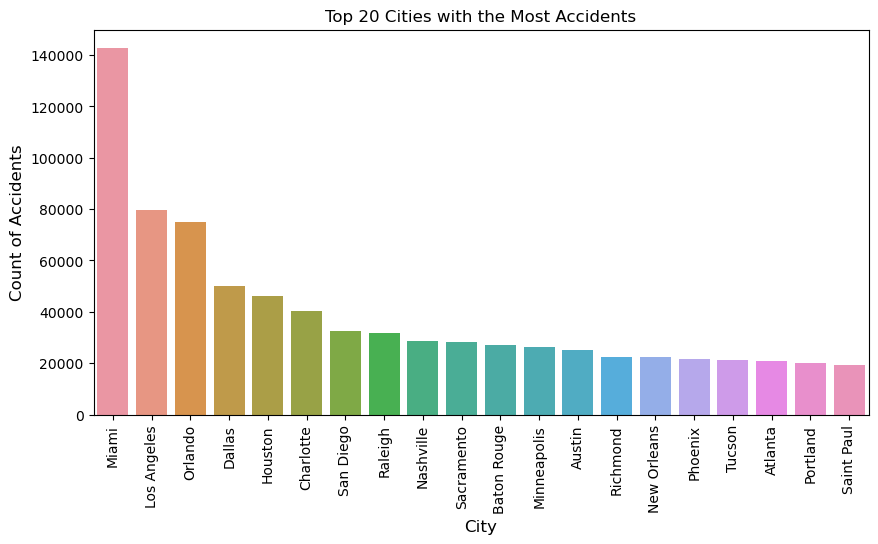

In [ ]:
# Get the top 20 cities with the most accidents
city_accident_counts = df['City'].value_counts().head(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=city_accident_counts.index, y=city_accident_counts.values, alpha=1)
plt.title('Top 20 Cities with the Most Accidents')
plt.ylabel('Count of Accidents', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Getting the Top 5 States with the most Accidents 

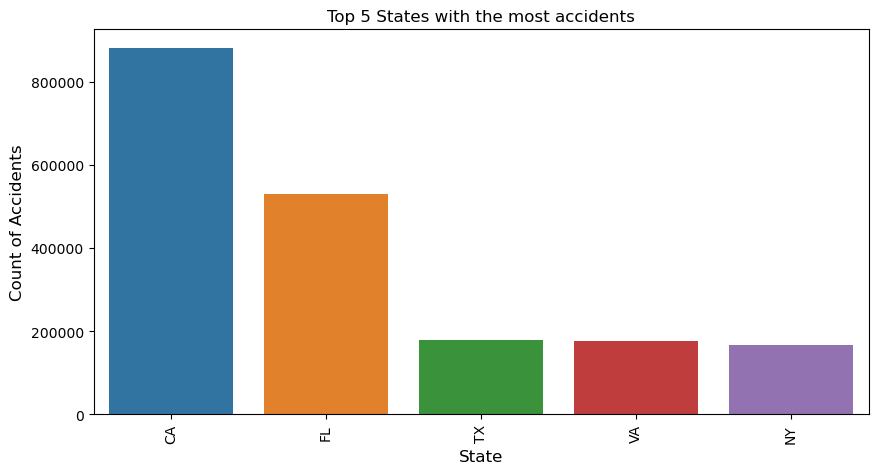

In [ ]:
# getting the top 5 States with the most accidents

top_5_states = state_counts[:5]

plt.figure(figsize=(10,5))
sns.barplot(x=top_5_states.index, y=top_5_states.values, alpha=1)
plt.title('Top 5 States with the most accidents')
plt.ylabel('Count of Accidents', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Plotting the Amount of Accidents by Year 

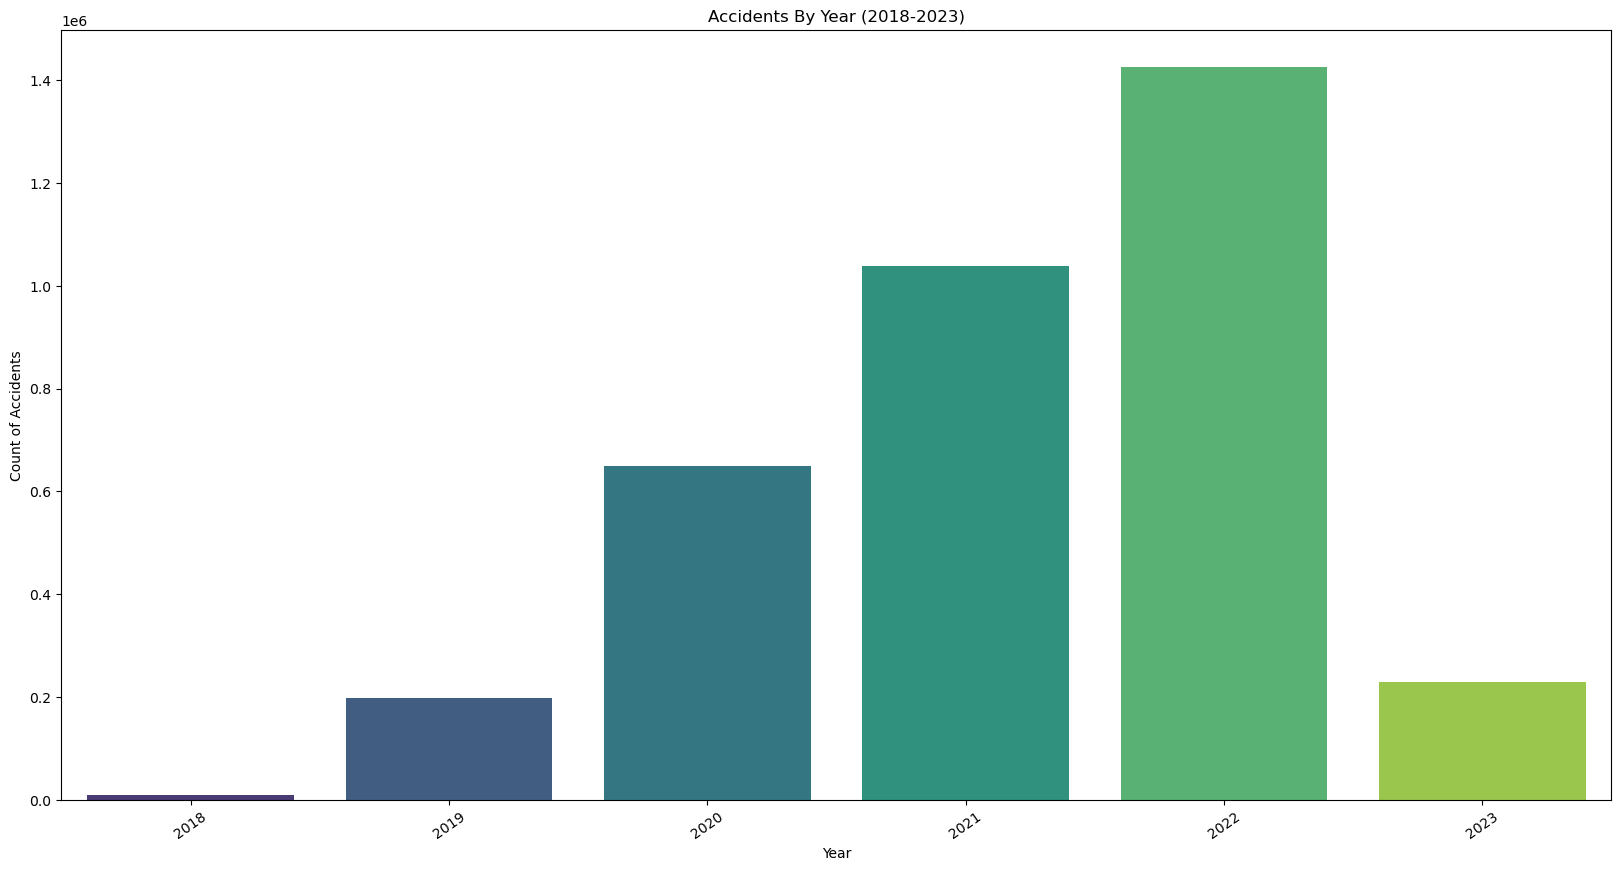

In [ ]:
# Creating a histogram of the accidents by year using Seaborn
df['Year'] = df['Start_Time'].dt.year
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Year', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Count of Accidents')
plt.title('Accidents By Year (2018-2023)')
plt.xticks(rotation=35)
plt.show()


#### We only have data going up until March of 2023, We can either drop the data or keep it, because we are looking for variables that are correlated with the severity of the accident and date, doesn't matter as much as time of day.

#### Severity Count of Accidents by Year 

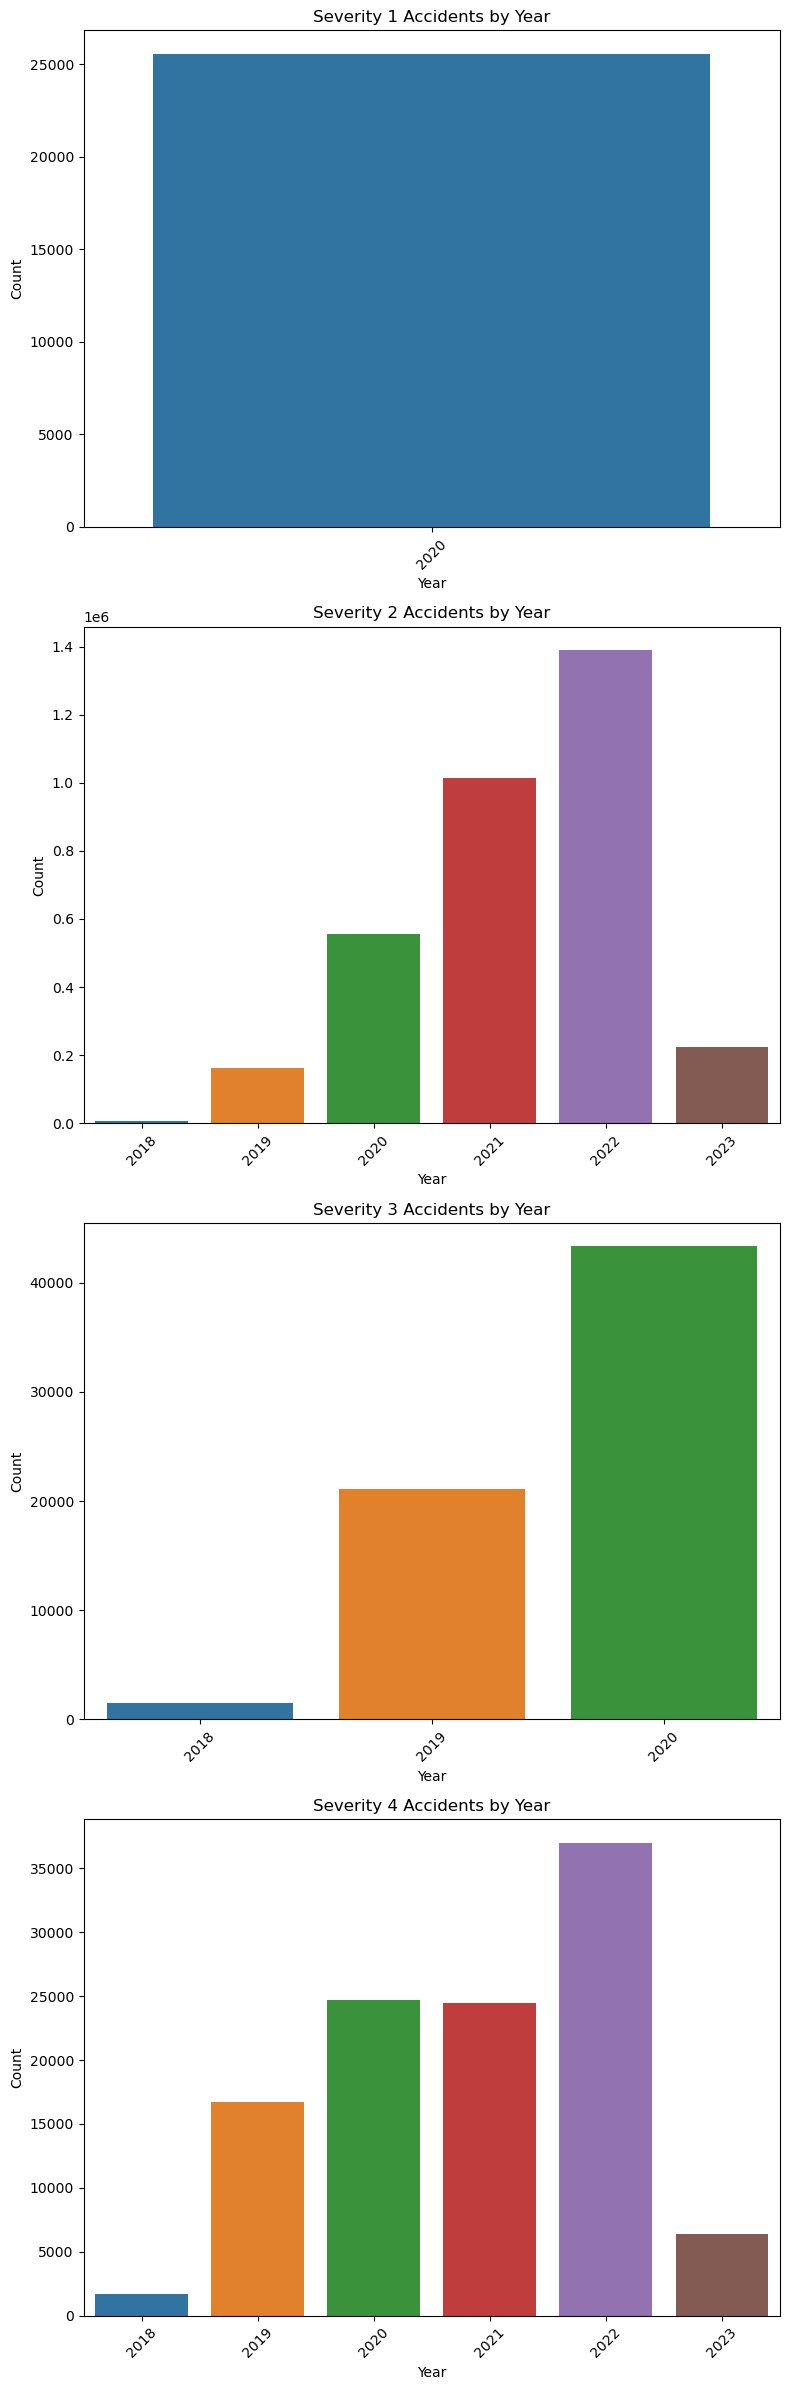

In [ ]:
# Extracting the year from the datetime column
df['Year'] = df['Start_Time'].dt.year

# Defining the severity 
severity_levels = [1, 2, 3, 4]

fig, axes = plt.subplots(len(severity_levels), figsize=(8, 6 * len(severity_levels)))


for i, severity in enumerate(severity_levels):
    subset = df[df['Severity'] == severity]
    
    count_by_year = subset.groupby('Year').size()
    
    sns.barplot(x=count_by_year.index, y=count_by_year.values, ax=axes[i])
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Severity {severity} Accidents by Year')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### Getting the most common Weather Conditions at The Time of the Accident

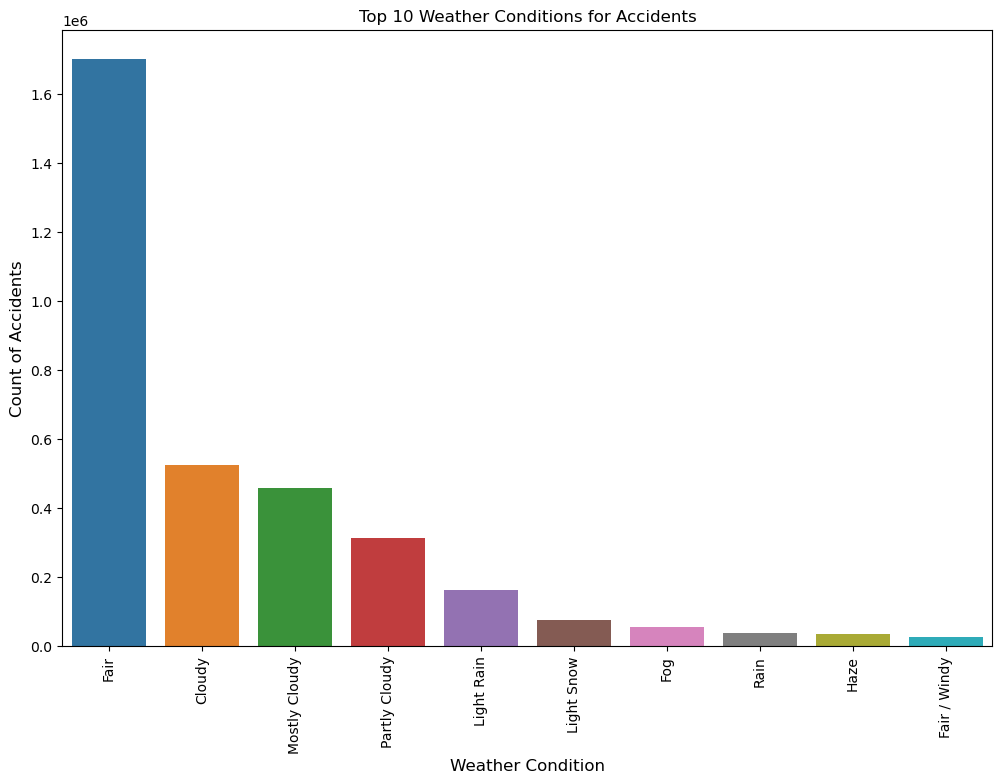

In [ ]:
weather_conditions = df['Weather_Condition'].value_counts()[:10]
plt.figure(figsize=(12,8))
sns.barplot(x=weather_conditions.index, y=weather_conditions.values, alpha=1)
plt.title('Top 10 Weather Conditions for Accidents')
plt.ylabel('Count of Accidents', fontsize=12)
plt.xlabel('Weather Condition', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Modeling the data  


#### Getting Mean, Median, Standard Deviation, Variance of the Severity of Accidents

In [ ]:
# getting the stats of the severity column
mean = df['Severity'].mean()
median = df['Severity'].median()
std_dev = df['Severity'].std()
variance = df['Severity'].var()

print(f'The mean of the severity column is {mean}')
print(f'The median of the severity column is {median}')
print(f'The standard deviation of the severity column is {std_dev}')
print(f'The variance of the severity column is {variance}')

The mean of the severity column is 2.073811105313826
The median of the severity column is 2.0
The standard deviation of the severity column is 0.3810629489479216
The variance of the severity column is 0.1452089710608863


### Getting the Stats Quickly 

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Year,Month,Weekday,Day,Hour,Minute
count,3.551471e+06,3.551471e+06,3.551471e+06,3.551471e+06,3.551471e+06,3.551471e+06,3.551471e+06,3.551471e+06,3.551471e+06,3.551471e+06,...,3.551471e+06,3.551471e+06,3.551471e+06,3551471.0,3.551471e+06,3.551471e+06,3.551471e+06,3.551471e+06,3.551471e+06,3.551471e+06
mean,2.073811e+00,3.610664e+01,-9.522731e+01,3.610684e+01,-9.522699e+01,8.464891e-01,6.113800e+01,5.982196e+01,6.372353e+01,2.935211e+01,...,2.613311e-02,1.046890e-03,9.122530e-02,0.0,2.021228e+03,6.725902e+00,2.817056e+00,1.581756e+01,1.286402e+01,2.956968e+01
std,3.810629e-01,5.348681e+00,1.801586e+01,5.348880e+00,1.801554e+01,1.816920e+00,1.936338e+01,2.163338e+01,2.292437e+01,1.138109e+00,...,1.595311e-01,3.233875e-02,2.879293e-01,0.0,1.019422e+00,3.794240e+00,1.876690e+00,8.650543e+00,5.769030e+00,1.720445e+01
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-4.500000e+01,-6.300000e+01,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.018000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.316955e+01,-1.175579e+02,3.317011e+01,-1.175560e+02,6.700000e-02,4.800000e+01,4.700000e+01,4.700000e+01,2.919000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.021000e+03,3.000000e+00,1.000000e+00,9.000000e+00,8.000000e+00,1.500000e+01
50%,2.000000e+00,3.602911e+01,-8.731111e+01,3.603224e+01,-8.731098e+01,2.640000e-01,6.300000e+01,6.300000e+01,6.600000e+01,2.972000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.021000e+03,7.000000e+00,3.000000e+00,1.600000e+01,1.400000e+01,3.000000e+01
75%,2.000000e+00,4.012564e+01,-8.021014e+01,4.012570e+01,-8.020992e+01,9.230000e-01,7.600000e+01,7.600000e+01,8.300000e+01,2.996000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.022000e+03,1.000000e+01,4.000000e+00,2.300000e+01,1.700000e+01,4.400000e+01
max,4.000000e+00,4.900050e+01,-6.748413e+01,4.900222e+01,-6.748413e+01,1.551860e+02,1.960000e+02,1.960000e+02,1.000000e+02,5.863000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,0.0,2.023000e+03,1.200000e+01,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01


#### Getting the KDE of the Severity of Accidents

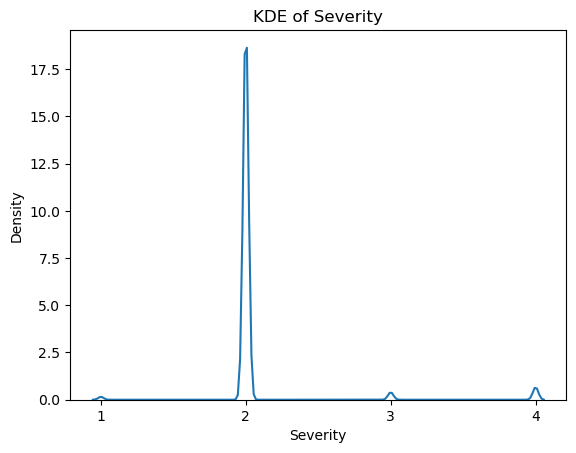

In [ ]:
# Plot the KDE
sns.kdeplot(df['Severity'])
plt.title('KDE of Severity')
plt.xlabel('Severity')
plt.ylabel('Density')

xmin, xmax = plt.xlim()
plt.xticks(np.arange(np.ceil(xmin), np.floor(xmax) + 1), 
           [str(int(val)) for val in np.arange(np.ceil(xmin), np.floor(xmax) + 1)])

plt.show()


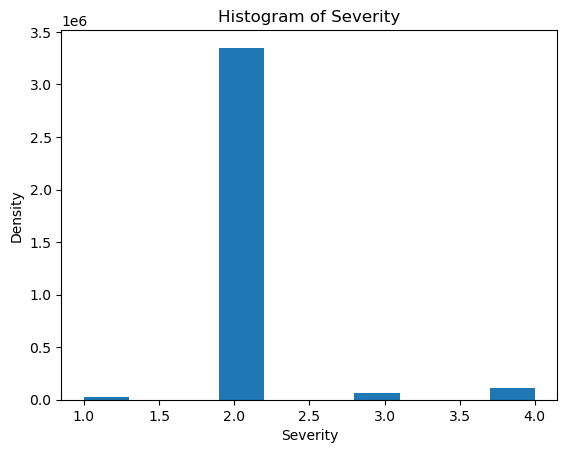

In [ ]:
# Elan internal comments to group 
# While we have mostly histograms above and I can see the value in trying to include a broader variety of plot types, I don't think that showing the severity in kde is very helpful, as the smoothing 
# is basically non-existent, and it just ends up essentially being a histogram
plt.hist(df['Severity'])
plt.title('Histogram of Severity')
plt.xlabel('Severity')
plt.ylabel('Density')
plt.plot;

### Data Manipluation

#### Changing some of the Values in the Data Frame to reduce the amount of unique values

Doing this makes our computational time much faster, and our system requirements much lower.

In [ ]:
weather_conditions = df['Weather_Condition'].unique()

print(weather_conditions)
print(len(weather_conditions))

['Overcast' 'Clear' 'Cloudy' 'Light Rain' 'Partly Cloudy' 'Light Snow'
 'Fair' 'Mostly Cloudy' 'Heavy Snow' 'Snow' 'Light Freezing Rain' 'Fog'
 'Mist' 'Light Freezing Fog' 'Cloudy / Windy' 'Blowing Snow' 'Haze' 'Rain'
 'Light Freezing Drizzle' 'Heavy Snow / Windy' 'Light Drizzle'
 'Heavy Drizzle' 'Drizzle' 'Light Ice Pellets' 'N/A Precipitation'
 'Fair / Windy' 'Scattered Clouds' 'Light Freezing Rain / Windy'
 'Wintry Mix' 'Heavy Rain' 'Light Thunderstorms and Rain'
 'Partly Cloudy / Windy' 'Light Rain Showers' 'Snow / Windy'
 'Heavy Thunderstorms with Small Hail' 'Heavy Thunderstorms and Rain'
 'Thunderstorms and Rain' 'Light Rain with Thunder' 'Light Rain / Windy'
 'Shallow Fog' 'Ice Pellets' 'Thunderstorm' 'Drizzle and Fog'
 'T-Storm / Windy' 'Thunder' 'Heavy T-Storm' 'Thunder in the Vicinity'
 'T-Storm' 'Smoke' 'Light Blowing Snow' 'Heavy Rain / Windy' 'Small Hail'
 'Rain / Windy' 'Light Drizzle / Windy' 'Light Snow / Windy'
 'Haze / Windy' 'Mostly Cloudy / Windy' 'Showers in the V

In [ ]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

### Severity by Weather Condition


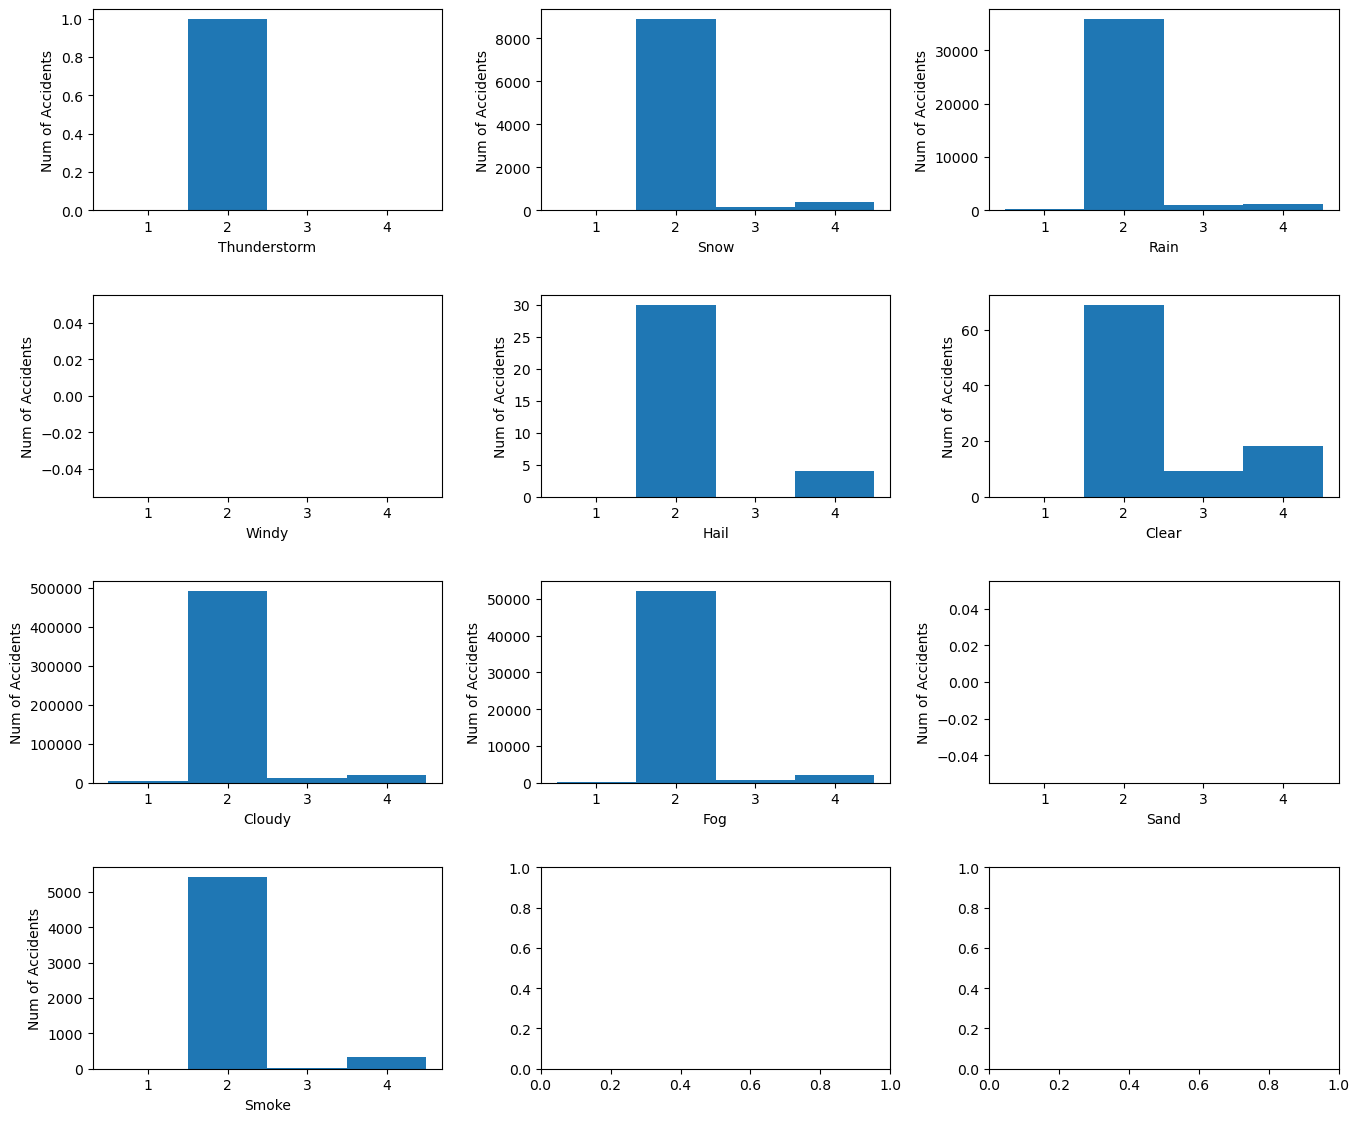

In [11]:
weather_types = ['Thunderstorm','Snow','Rain','Windy','Hail','Clear','Cloudy','Fog','Sand','Smoke']
fig, axes = plt.subplots(nrows=4,ncols=3,figsize=(14,12))
fig.tight_layout(pad = 4.0)

i = 0
for weather in weather_types:
    row = i // 3
    col = i % 3
    weatherdf = df[df['Weather_Condition'] == weather]
    axes[row,col].hist(weatherdf['Severity'],bins=4,range=[0.5,4.5])
    axes[row,col].set_xlabel(weather)
    axes[row,col].set_ylabel('Num of Accidents')
    i += 1
    
plt.show;


C:\Users\elanw\AppData\Local\Temp\ipykernel_25248\1071391404.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  severityDF = severityDF[df['Weather_Condition'].isin(weather_types)]
C:\Users\elanw\AppData\Local\Temp\ipykernel_25248\1071391404.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  severityDF = severityDF[df['Weather_Condition'].isin(weather_types)]
C:\Users\elanw\AppData\Local\Temp\ipykernel_25248\1071391404.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  severityDF = severityDF[df['Weather_Condition'].isin(weather_types)]
C:\Users\elanw\AppData\Local\Temp\ipykernel_25248\1071391404.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  severityDF = severityDF[df['Weather_Condition'].isin(weather_types)]


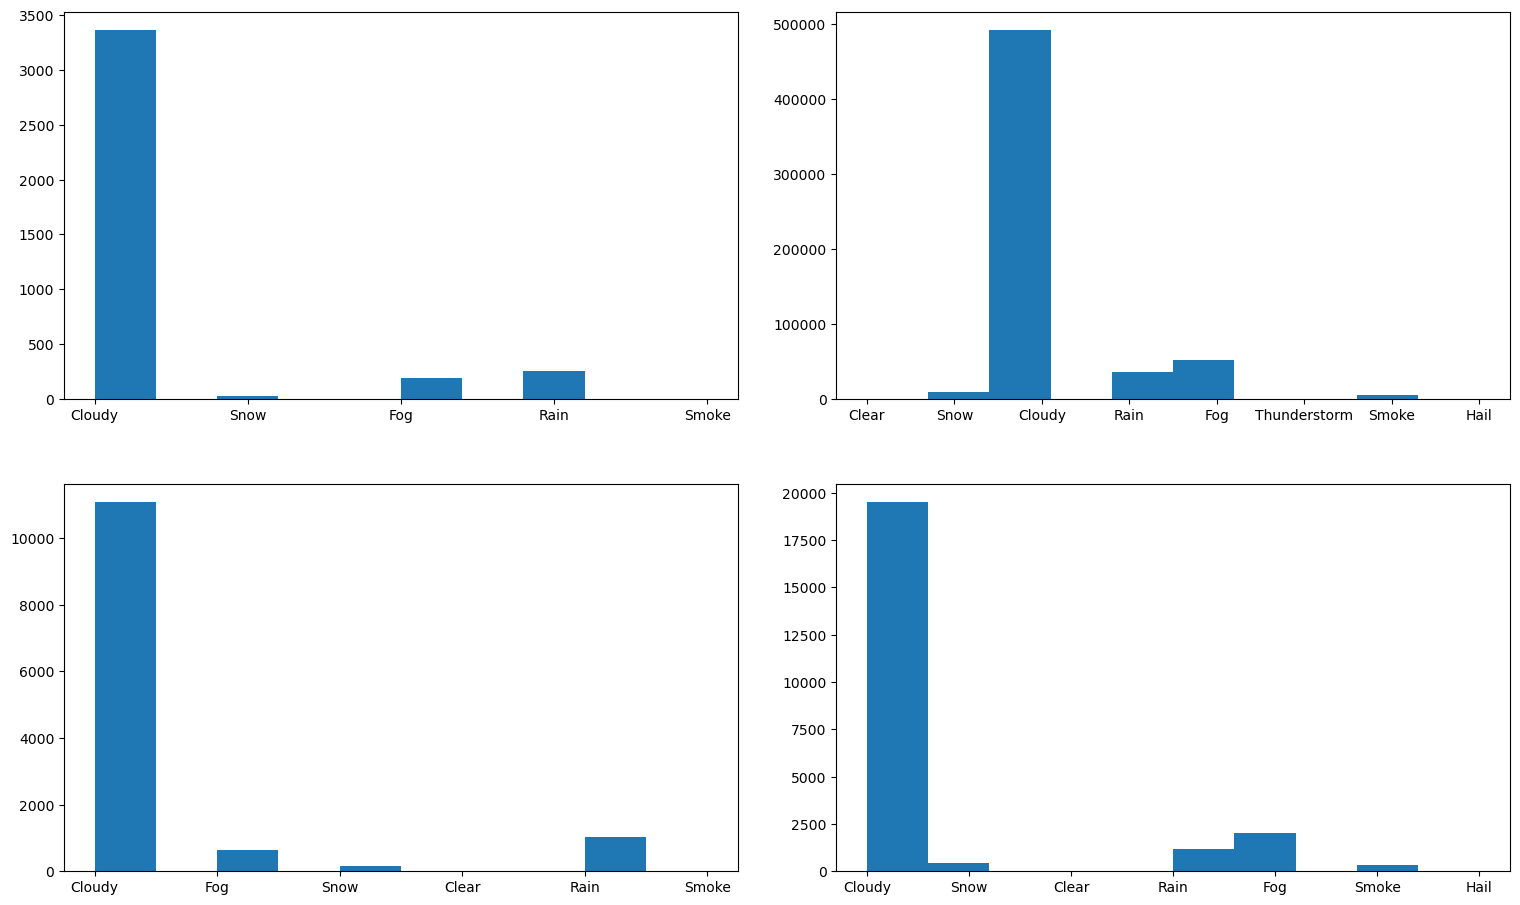

In [18]:
import matplotlib.pyplot as plt

severity_levels = [1,2,3,4]

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(16,10))
fig.tight_layout(pad = 4.0)
weather_types = ['Thunderstorm','Snow','Rain','Windy','Hail','Clear','Cloudy','Fog','Sand','Smoke']

i = 0
for severity in severity_levels:
    row = i // 2
    col = i % 2
    severityDF = df[df['Severity'] == severity]
    severityDF = severityDF[df['Weather_Condition'].isin(weather_types)]
    axes[row,col].hist(severityDF['Weather_Condition'],bins = 10)
    i += 1
    
plt.show;

### Severity by Environmental Features

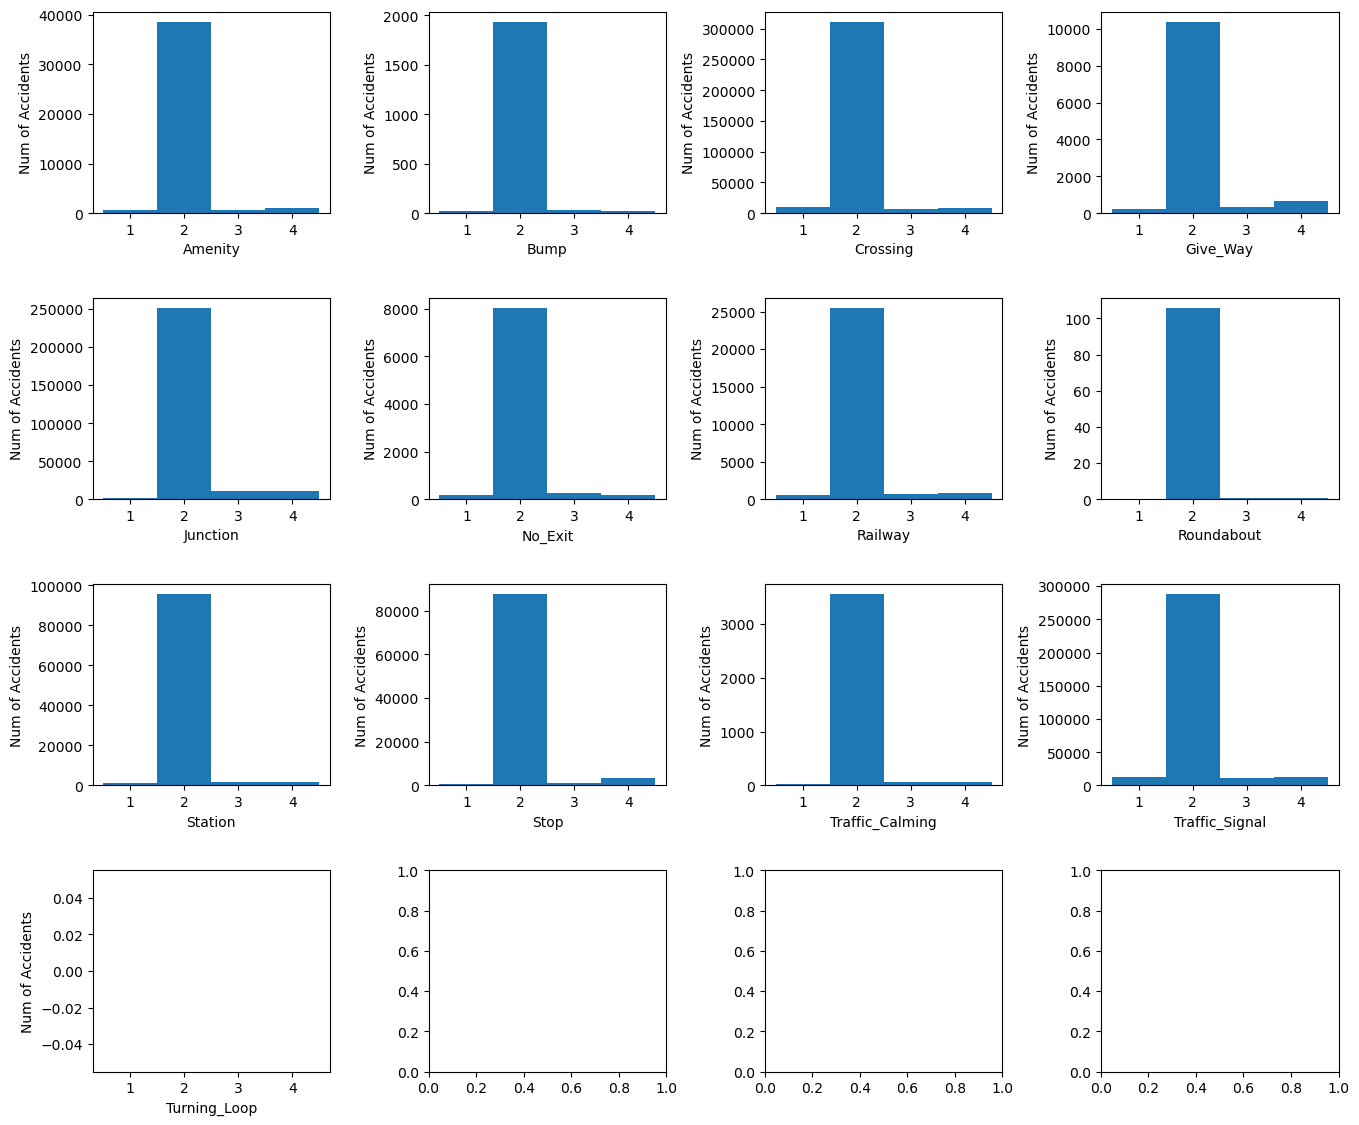

In [32]:
environmentalFeatures = ['Turning_Loop','Traffic_Signal','Traffic_Calming','Stop','Station','Roundabout','Railway','No_Exit','Junction','Give_Way','Crossing','Bump','Amenity']
environmentalFeatures =  environmentalFeatures[::-1]
fig, axes = plt.subplots(nrows=4,ncols=4,figsize=(14,12))
fig.tight_layout(pad = 4.0)

i = 0
for environmentFeature in environmentalFeatures:
    row = i // 4
    col = i % 4
    envFeatdf = df[df[environmentFeature] == 1]
    axes[row,col].hist(envFeatdf['Severity'],bins=4,range=[0.5,4.5])
    axes[row,col].set_xlabel(environmentFeature)
    axes[row,col].set_ylabel('Num of Accidents')
    i += 1
    
plt.show;

C:\Users\elanw\AppData\Local\Temp\ipykernel_24848\2145577616.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row,col].set_xticklabels(labels, rotation=90)


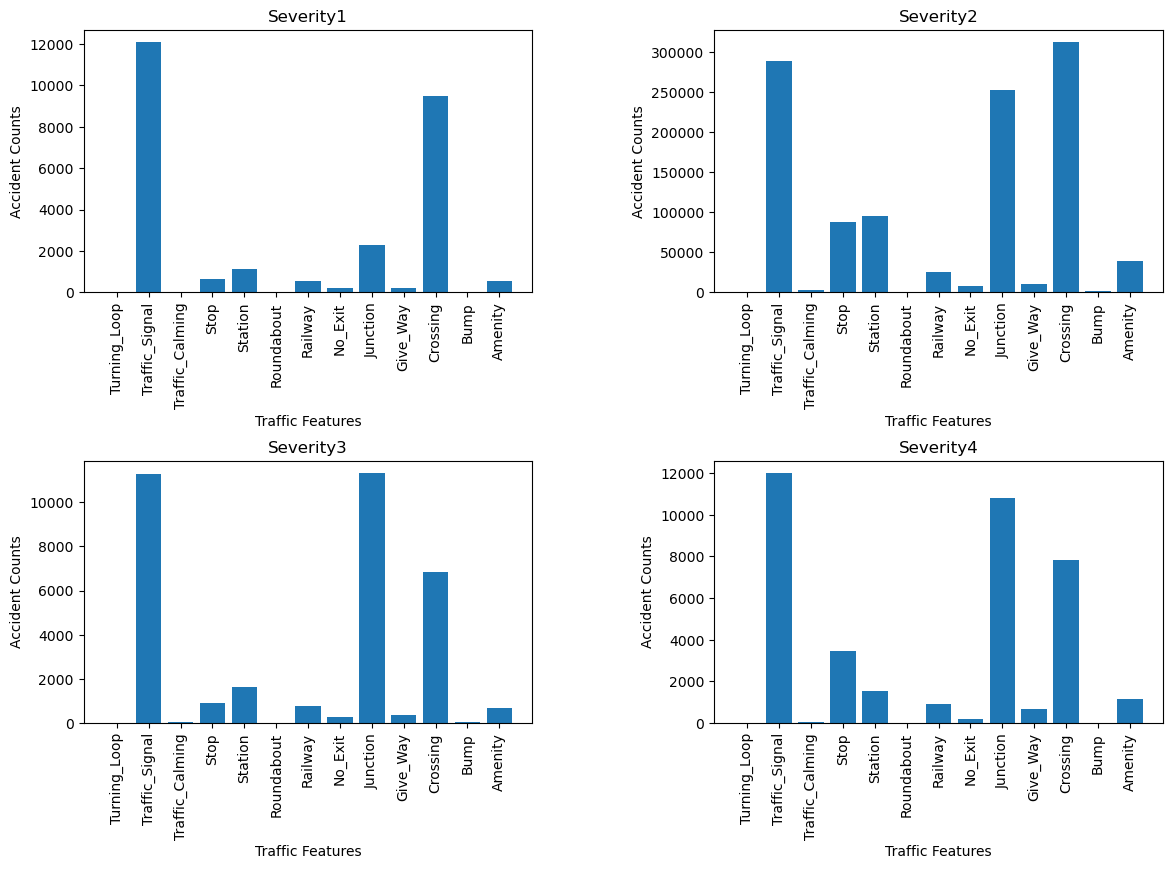

In [114]:
severity_levels = [1,2,3,4]

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(14,10))
fig.tight_layout(pad = 10.0)

i = 0
for severity in severity_levels:
    row = i // 2
    col = i % 2
    severityDF = df[df['Severity'] == severity]
    labels = ['Turning_Loop','Traffic_Signal','Traffic_Calming','Stop','Station','Roundabout','Railway','No_Exit','Junction','Give_Way','Crossing','Bump','Amenity']
    vals = []
    for label in labels:
        vals.append(severityDF[label].sum())
    axes[row,col].bar(labels,vals)
    axes[row,col].set_xticklabels(labels, rotation=90)
    axes[row,col].set_xlabel('Traffic Features')
    axes[row,col].set_ylabel('Accident Counts')
    axes[row,col].set_title(('Severity' + str(severity)))

    i += 1

plt.plot();

### Checking the Wind Direction

In [21]:
df["Wind_Direction"].unique()

array(['WNW', 'NW', 'CALM', 'North', 'VAR', 'WSW', 'SW', 'South', 'ENE',
       'N', 'SSW', 'Variable', 'West', 'NNW', 'NNE', 'S', 'SE', 'East',
       'SSE', 'ESE', 'W', 'E', 'NE'], dtype=object)

#### Changing the Wind Directions

In [22]:
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"

df["Wind_Direction"] = df["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

df["Wind_Direction"].unique()

array(['NW', 'Calm', 'N', 'Variable', 'SW', 'S', 'NE', 'W', 'SE', 'E'],
      dtype=object)

# Section 4: Model Selection 

#### We are going to be deciding on which model to use to predict the Severity of the accident
#### Option 1: `Classification Tree`
#### Option 2: `Logistic Regression`

#### We are going to start with the `Classification Model` and see how it performs.

In [23]:
## Importing all of the libraries needed for the Classification and log from sklearn to predict the severity column

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Model Exploration with Weather and Environment

### `Only Weather`

In [42]:
weather_df = df

for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = np.round(df[col]).astype('int64')
weather_df = df.select_dtypes(exclude=['datetime64[ns]'])

weather_df= pd.get_dummies(weather_df['Weather_Condition'])
weather_df = weather_df[weather_df['Weather_Condition' * 1]]

drop_cols = ['Severity','ID','Start_Lat','Start_Lng','End_Lat','End_Lng','Distance(mi)','End_Time','City','County','State','Zipcode','Weather_Timestamp','Source','Junction','No_Exit','Railway','Roundabout', 'Amenity','Bump','Crossing','Give_Way','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Wind_Direction']
weather_df = weather_df.drop(columns=drop_cols)

weather_df.head()

MemoryError: Unable to allocate 704. MiB for an array with shape (26, 3551471) and data type int64

### `Only Environment`

In [22]:
env_df = df

for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = np.round(df[col]).astype('int64')



env_df = df.select_dtypes(exclude=['datetime64[ns]'])
drop_cols = ['Severity','ID','Start_Lat','Start_Lng','End_Lat','End_Lng','Distance(mi)','End_Time','City','County','State','Zipcode','Weather_Timestamp']
env_df = env_df.drop(columns=drop_cols)


env_df.head()

,Source,End_Time,City,County,State,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
7576435,Source1,2018-01-01 06:07:06,South Bend,St. Joseph,IN,46628,2018-01-01 00:43:00,10,-5,80,...,0,0,0,0,0,0,0,0,0,Night
7576681,Source1,2018-01-01 07:17:30,Omaha,Douglas,NE,68107,2018-01-01 00:56:00,-14,-28,66,...,0,0,0,0,0,0,0,0,0,Night
7576589,Source1,2018-01-01 02:21:00,East Freedom,Blair,PA,16637,2018-01-01 01:53:00,11,-1,70,...,0,0,0,0,0,0,0,0,0,Night
7576588,Source1,2018-01-01 02:21:00,Duncansville,Blair,PA,16635,2018-01-01 01:53:00,11,-1,70,...,0,0,0,0,0,0,0,0,0,Night
7576780,Source1,2018-01-01 08:02:29,Green River,Emery,UT,84525,2018-01-01 01:53:00,21,21,92,...,0,0,0,0,0,0,0,0,0,Night


### `Classification Model`

In [34]:
# Dropping na values from the df
df = df.dropna()

# Printing all of the headers to see what we have to work with

print(df.columns)

# Printing the data types of the columns 

print(df.dtypes)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 'County',
       'State', 'Zipcode', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute'],
      dtype='object')
ID                           object
Source                       object
Severity                      int64
Start_Time           datetime64[ns]
End_Time                     object
Start_Lat                   float64
Start_Lng                   float64
End_Lat                     float64
End_Lng                     float64
Distance(mi)    

### Rounding all of the integer values to the nearest whole number, and changing the data type to integer 

In [37]:
# changing the data type of the data types from floats to ints 

for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = np.round(df[col]).astype('int64')

# Dropping all objects from the df 
df = df.select_dtypes(exclude=['object'])
df = df.select_dtypes(exclude=['datetime64[ns]'])

# Printing the data types of the columns to verify 
print(df.dtypes)

Severity             int64
Start_Lat            int64
Start_Lng            int64
End_Lat              int64
End_Lng              int64
Distance(mi)         int64
Temperature(F)       int64
Wind_Chill(F)        int64
Humidity(%)          int64
Pressure(in)         int64
Visibility(mi)       int64
Wind_Speed(mph)      int64
Precipitation(in)    int64
Amenity              int64
Bump                 int64
Crossing             int64
Give_Way             int64
Junction             int64
No_Exit              int64
Railway              int64
Roundabout           int64
Station              int64
Stop                 int64
Traffic_Calming      int64
Traffic_Signal       int64
Turning_Loop         int64
Year                 int64
Month                int64
Weekday              int64
Day                  int64
Hour                 int64
Minute               int64
dtype: object


### `Creating the Models Data Frames`

In [40]:
# splitting the data into features and target

X = df.drop('Severity', axis=1)  # Features
y = df['Severity']               # Target


In [41]:
# Setting up the Training Sets and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### `Standardizing the Data`

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Creating the classifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### `Testing The Accuracy of the Model`

In [44]:
y_pred = clf.predict(X_test)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.9526
              precision    recall  f1-score   support

           1       0.81      0.62      0.70      5076
           2       0.97      0.99      0.98    669374
           3       0.77      0.59      0.67     13292
           4       0.41      0.25      0.31     22068

    accuracy                           0.95    709810
   macro avg       0.74      0.61      0.66    709810
weighted avg       0.94      0.95      0.95    709810



# Section 5: Model Evaluation And Analysis

# Section 6: Conclusion and Recommendations